In [1]:
import pandas as pd
import datasets as ds
import nltk
import numpy as np

C:\Users\8888\Anaconda3\envs\SemEval2025_Task11\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
train = pd.DataFrame(ds.load_dataset("dev_phase2/subtask2/train/spa", split="train"))

In [3]:
train.head()

,id,text,political,racial/ethnic,religious,gender/sexual,other
0,spa_bc7bf0a1b710cd724cf96b5eeb020bff,"""bueno, tirando""\ny si hay repregunta, entonce...",0,0,0,0,0
1,spa_688aec0f6abf4e0be44ecbfa886251cc,"""caimos en su retorica de indigena""",0,0,0,0,0
2,spa_47019efabe7295c630bcc04bd0429230,"""cara de indigena sudaca"", porque pio asi luego?",0,0,0,0,0
3,spa_8b4b244dbb90e0a813661ed12a1af5af,"""violar a una nina es menos grave que un abort...",0,0,0,0,1
4,spa_e2f37881da08b8d7b6eb07bc37356746,"""yo decido quien es judio y quien no""",0,1,0,0,0


In [4]:
print(len(train))

3305


In [5]:
get_length = lambda text: len(nltk.word_tokenize(text))
train["length"] = train["text"].apply(get_length)

In [6]:
print(train["length"].describe())

count    3305.000000
mean       12.271710
std         6.240053
min         3.000000
25%         7.000000
50%        11.000000
75%        16.000000
max        58.000000
Name: length, dtype: float64


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

a: []
a: []
a: 0
a: []
a: []
a: 0
a: []
a: []
a: 0


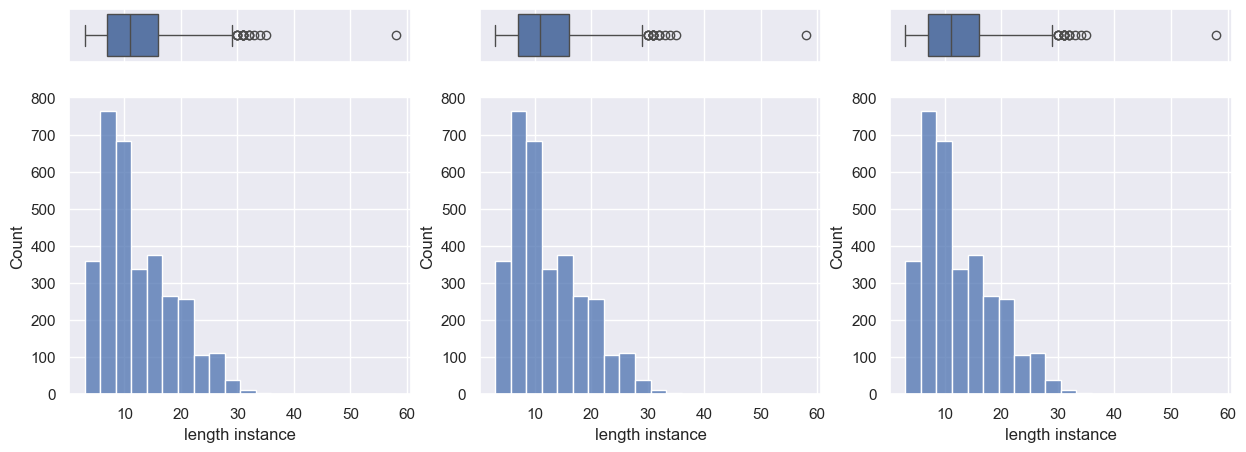

In [8]:
sns.set(style="darkgrid")
f, ((ax_box, ax_box1, ax_box2), (ax_hist, ax_hist1, ax_hist2)) = plt.subplots(2, 3, figsize=(15, 5), sharex=True, sharey=False, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(train, ax=ax_box, x="length")
sns.histplot(data=train, x="length", ax=ax_hist, bins=20)
sns.boxplot(train, ax=ax_box1, x="length")
sns.histplot(data=train, x="length", ax=ax_hist1, bins=20)
sns.boxplot(train, ax=ax_box2, x="length")
sns.histplot(data=train, x="length", ax=ax_hist2, bins=20)
ax_box.set(xlabel="")
ax_hist.set(xlabel="length instance")
ax_box1.set(xlabel="")
ax_hist1.set(xlabel="length instance")
ax_box2.set(xlabel="")
ax_hist2.set(xlabel="length instance")
plt.show()

a: []
a: []
a: 0
a: []
a: []
a: 0
a: []
a: []
a: 0


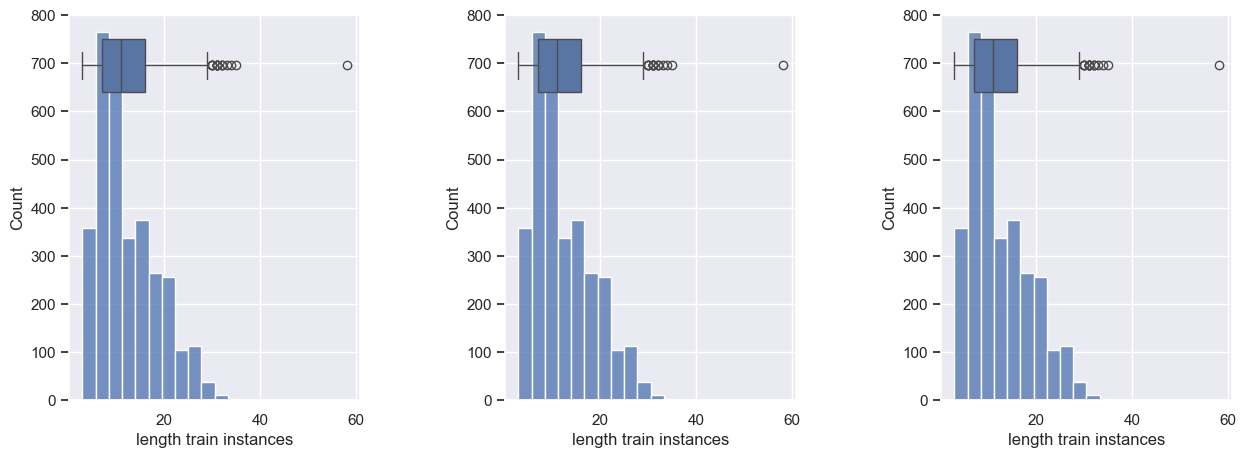

In [9]:
sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for data_name, data, max_value, ax in zip([" train ", " train ", " train "],
                                          [train, train, train],
                                          [800, 800, 800],
                                          axes):
  sns.histplot(data, ax=ax, x="length", bins=20)
  ax2 = ax.twinx()
  sns.boxplot(data, ax=ax2, x="length")
  ax2.set_ylim([-5,.75])
  ax2.set_axis_off()
  ax.set_ylim([0,max_value])
  ax.set(xlabel=f"length{data_name}instances")
plt.subplots_adjust(wspace=0.5)
plt.show()

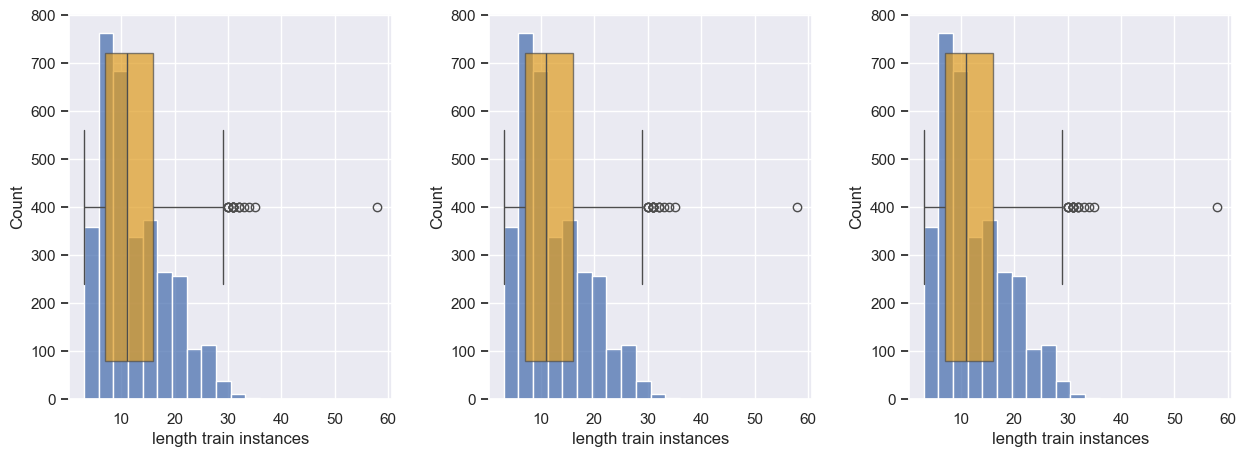

In [10]:
sns.set(style="darkgrid")
f, axs = plt.subplots(1, 3, figsize=(15, 5))
for data_name, data, ax in zip([" train ", " train ", " train "],
                               [train, train, train],
                               axs):
  sns.histplot(data, ax=ax, x="length", bins=20)
  ax2 = ax.twinx()
  sns.boxplot(data, ax=ax2, x="length", boxprops=dict(alpha=.7), color="orange")
  ax2.set_axis_off()
  ax.set(xlabel=f"length{data_name}instances")
plt.subplots_adjust(wspace=0.3)
plt.show()

In [11]:
df_multilabel_train = train[["text", "political", "racial/ethnic", "religious", "gender/sexual", "other", "length"]]
df_multilabel_train = df_multilabel_train.rename(columns={"text": "text"})

In [12]:
LABELS = ["political", "racial/ethnic", "religious", "gender/sexual", "other"]
counts_train = {}
for label in LABELS:
  counts_train[label] = len(df_multilabel_train[df_multilabel_train[label] == 1])

In [13]:
groups = {}
for label in LABELS:
  groups[label] = [counts_train[label], counts_train[label], counts_train[label], counts_train[label], counts_train[label]]

In [14]:
print(groups)

{'political': [901, 901, 901, 901, 901], 'racial/ethnic': [623, 623, 623, 623, 623], 'religious': [525, 525, 525, 525, 525], 'gender/sexual': [443, 443, 443, 443, 443], 'other': [443, 443, 443, 443, 443]}


In [15]:
def autolabel(rects, _ax):
    for rect in rects:
        height = rect.get_height()
        _ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

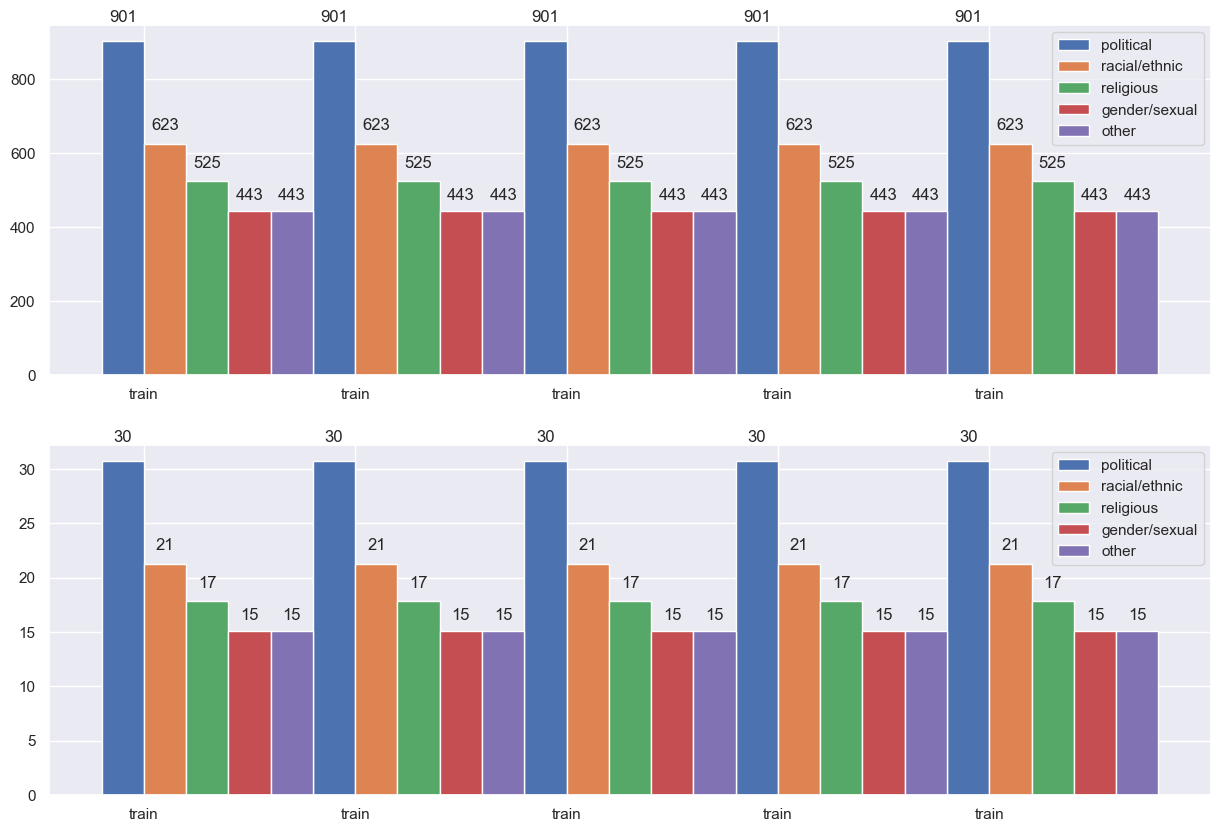

In [16]:
fig, (ax, ax1) =  plt.subplots(2, 1, figsize=(15, 10))
values = counts_train.values()
barwidth = 0.2
bars = np.arange(len(groups))
cmap = plt.colormaps["tab20c"]
colors = cmap(np.arange(4)*4)
rects = []
for i, group in enumerate(groups):
  rects.append(
      ax.bar(bars+i*barwidth, groups[group], width=barwidth)
      )
ax.legend(rects, LABELS)
for rect in rects:
  autolabel(rect, ax)
ax.set_xticks(bars+barwidth/2)
groups_title = ["train", "train", "train", "train","train"]
ax.set_xticklabels(["train", "train", "train", "train","train"])
groups = {}
for label in LABELS:
  groups[label] = [
      counts_train[label]/sum(counts_train.values())*100,
      counts_train[label]/sum(counts_train.values())*100,
      counts_train[label]/sum(counts_train.values())*100,
      counts_train[label]/sum(counts_train.values())*100,
      counts_train[label]/sum(counts_train.values())*100
      ]
rects = []
for i, group in enumerate(groups):
  rects.append(
      ax1.bar(bars+i*barwidth, groups[group], width=barwidth)
      )
ax1.legend(rects, LABELS)
for rect in rects:
  autolabel(rect, ax1)
ax1.set_xticks(bars+barwidth/2)
ax1.set_xticklabels(["train", "train", "train", "train","train"])
plt.show()

In [17]:
print(df_multilabel_train.head(10))

                                                text  political  \
0  "bueno, tirando"\ny si hay repregunta, entonce...          0   
1                "caimos en su retorica de indigena"          0   
2   "cara de indigena sudaca", porque pio asi luego?          0   
3  "violar a una nina es menos grave que un abort...          0   
4              "yo decido quien es judio y quien no"          0   
5  #8m e cada dia en defensa dun xornalismo femin...          0   
6  #chvnoticias la muerte de ninos no se transa p...          0   
7  #corrupcion#prensa#desestabilizadora#nido#rata...          1   
8  #ecuador | la cancilleria implementa plan de a...          0   
9  #importante | te decimos la ubicacion de los 1...          0   

   racial/ethnic  religious  gender/sexual  other  length  
0              0          0              0      0      22  
1              0          0              0      0       8  
2              0          0              0      0      12  
3              0      

In [18]:
df_multilabel_train["label"] = 0
for i, label in enumerate(LABELS):
  op = (1<< i)  
  df_multilabel_train["label"].mask(df_multilabel_train[label] == 1, df_multilabel_train["label"]|op, inplace=True)

In [19]:
labels = [
    "none",
    "political",
    "racial/ethnic",
    "political y racial/ethnic",
    "religious",
    "political y religious",
    "racial/ethnic y religious",
    "political y racial/ethnic y religious",
    "gender/sexual",
    "political y gender/sexual",
    "racial/ethnic y gender/sexual",
    "political y racial/ethnic y gender/sexual",
    "religious y gender/sexual",
    "political y religious y gender/sexual",
    "racial/ethnic y religious y gender/sexual",
    "political y racial/ethnic y religious y gender/sexual",
    "other",
    "political y other",
    "racial/ethnic y other",
    "political y racial/ethnic y other",
    "religious y other",
    "political y religious y other",
    "racial/ethnic y religious y other",
    "political y racial/ethnic y religious y other",
    "gender/sexual y other",
    "political y gender/sexual y other",
    "racial/ethnic y gender/sexual y other",
    "political y racial/ethnic y gender/sexual y other",
    "religious y gender/sexual y other",
    "political y religious y gender/sexual y other",
    "racial/ethnic y religious y gender/sexual y other",
    "political y racial/ethnic y religious y gender/sexual y other"
    # "none",
    # "Anger",
    # "Fear",
    # "Anger y Fear",
    # "Joy",
    # "Anger y Joy",
    # "Fear y Joy",
    # "Anger y Fear y Joy",
    # "Sadness",
    # "Anger y Sadness",
    # "Fear y Sadness",
    # "Anger y Fear y Sadness",
    # "Joy y Sadness",
    # "Anger y Joy y Sadness",
    # "Fear y Joy y Sadness",
    # "Anger y Fear y Joy y Sadness",
    # "Surprise",
    # "Anger y Surprise",
    # "Fear y Surprise",
    # "Anger y Fear y Surprise",
    # "Joy y Surprise",
    # "Anger y Joy y Surprise",
    # "Fear y Joy y Surprise",
    # "Anger y Fear y Joy y Surprise",
    # "Sadness y Surprise",
    # "Anger y Sadness y Surprise",
    # "Fear y Sadness y Surprise",
    # "Anger y Fear y Sadness y Surprise",
    # "Joy y Sadness y Surprise",
    # "Anger y Joy y Sadness y Surprise",
    # "Fear y Joy y Sadness y Surprise",
    # "Anger y Fear y Joy y Sadness y Surprise"
]

In [20]:
df_multilabel_tmp = df_multilabel_train.copy()
for i, text in enumerate(labels):
  df_multilabel_tmp.loc[df_multilabel_tmp["label"] == i, "label_text"] = text
  df_multilabel_tmp.loc[df_multilabel_tmp["label"] == i, "label"] = str(i)
df_multilabel_tmp.head(10)

,text,political,racial/ethnic,religious,gender/sexual,other,length,label,label_text
0,"""bueno, tirando""\ny si hay repregunta, entonce...",0,0,0,0,0,22,0,none
1,"""caimos en su retorica de indigena""",0,0,0,0,0,8,0,none
2,"""cara de indigena sudaca"", porque pio asi luego?",0,0,0,0,0,12,0,none
3,"""violar a una nina es menos grave que un abort...",0,0,0,0,1,20,16,other
4,"""yo decido quien es judio y quien no""",0,1,0,0,0,10,2,racial/ethnic
5,#8m e cada dia en defensa dun xornalismo femin...,0,0,0,0,0,11,0,none
6,#chvnoticias la muerte de ninos no se transa p...,0,1,1,0,0,13,6,racial/ethnic y religious
7,#corrupcion#prensa#desestabilizadora#nido#rata...,1,0,0,0,1,11,17,political y other
8,#ecuador | la cancilleria implementa plan de a...,0,0,0,0,0,16,0,none
9,#importante | te decimos la ubicacion de los 1...,0,0,0,0,0,25,0,none


C:\Users\8888\AppData\Local\Temp\ipykernel_18180\172891390.py:3: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.kdeplot(data=df_multilabel_tmp, x='length', hue='label_text', legend=True, ax=ax1, palette=colors)
C:\Users\8888\AppData\Local\Temp\ipykernel_18180\172891390.py:3: UserWarning: The palette list has more values (64) than needed (30), which may not be intended.
  sns.kdeplot(data=df_multilabel_tmp, x='length', hue='label_text', legend=True, ax=ax1, palette=colors)
C:\Users\8888\AppData\Local\Temp\ipykernel_18180\172891390.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df_multilabel_tmp, x='length', hue='label_text', legend=True, ax=ax1, palette=colors)


Text(0.5, 1.0, 'Distribution of the size of texts for each class')

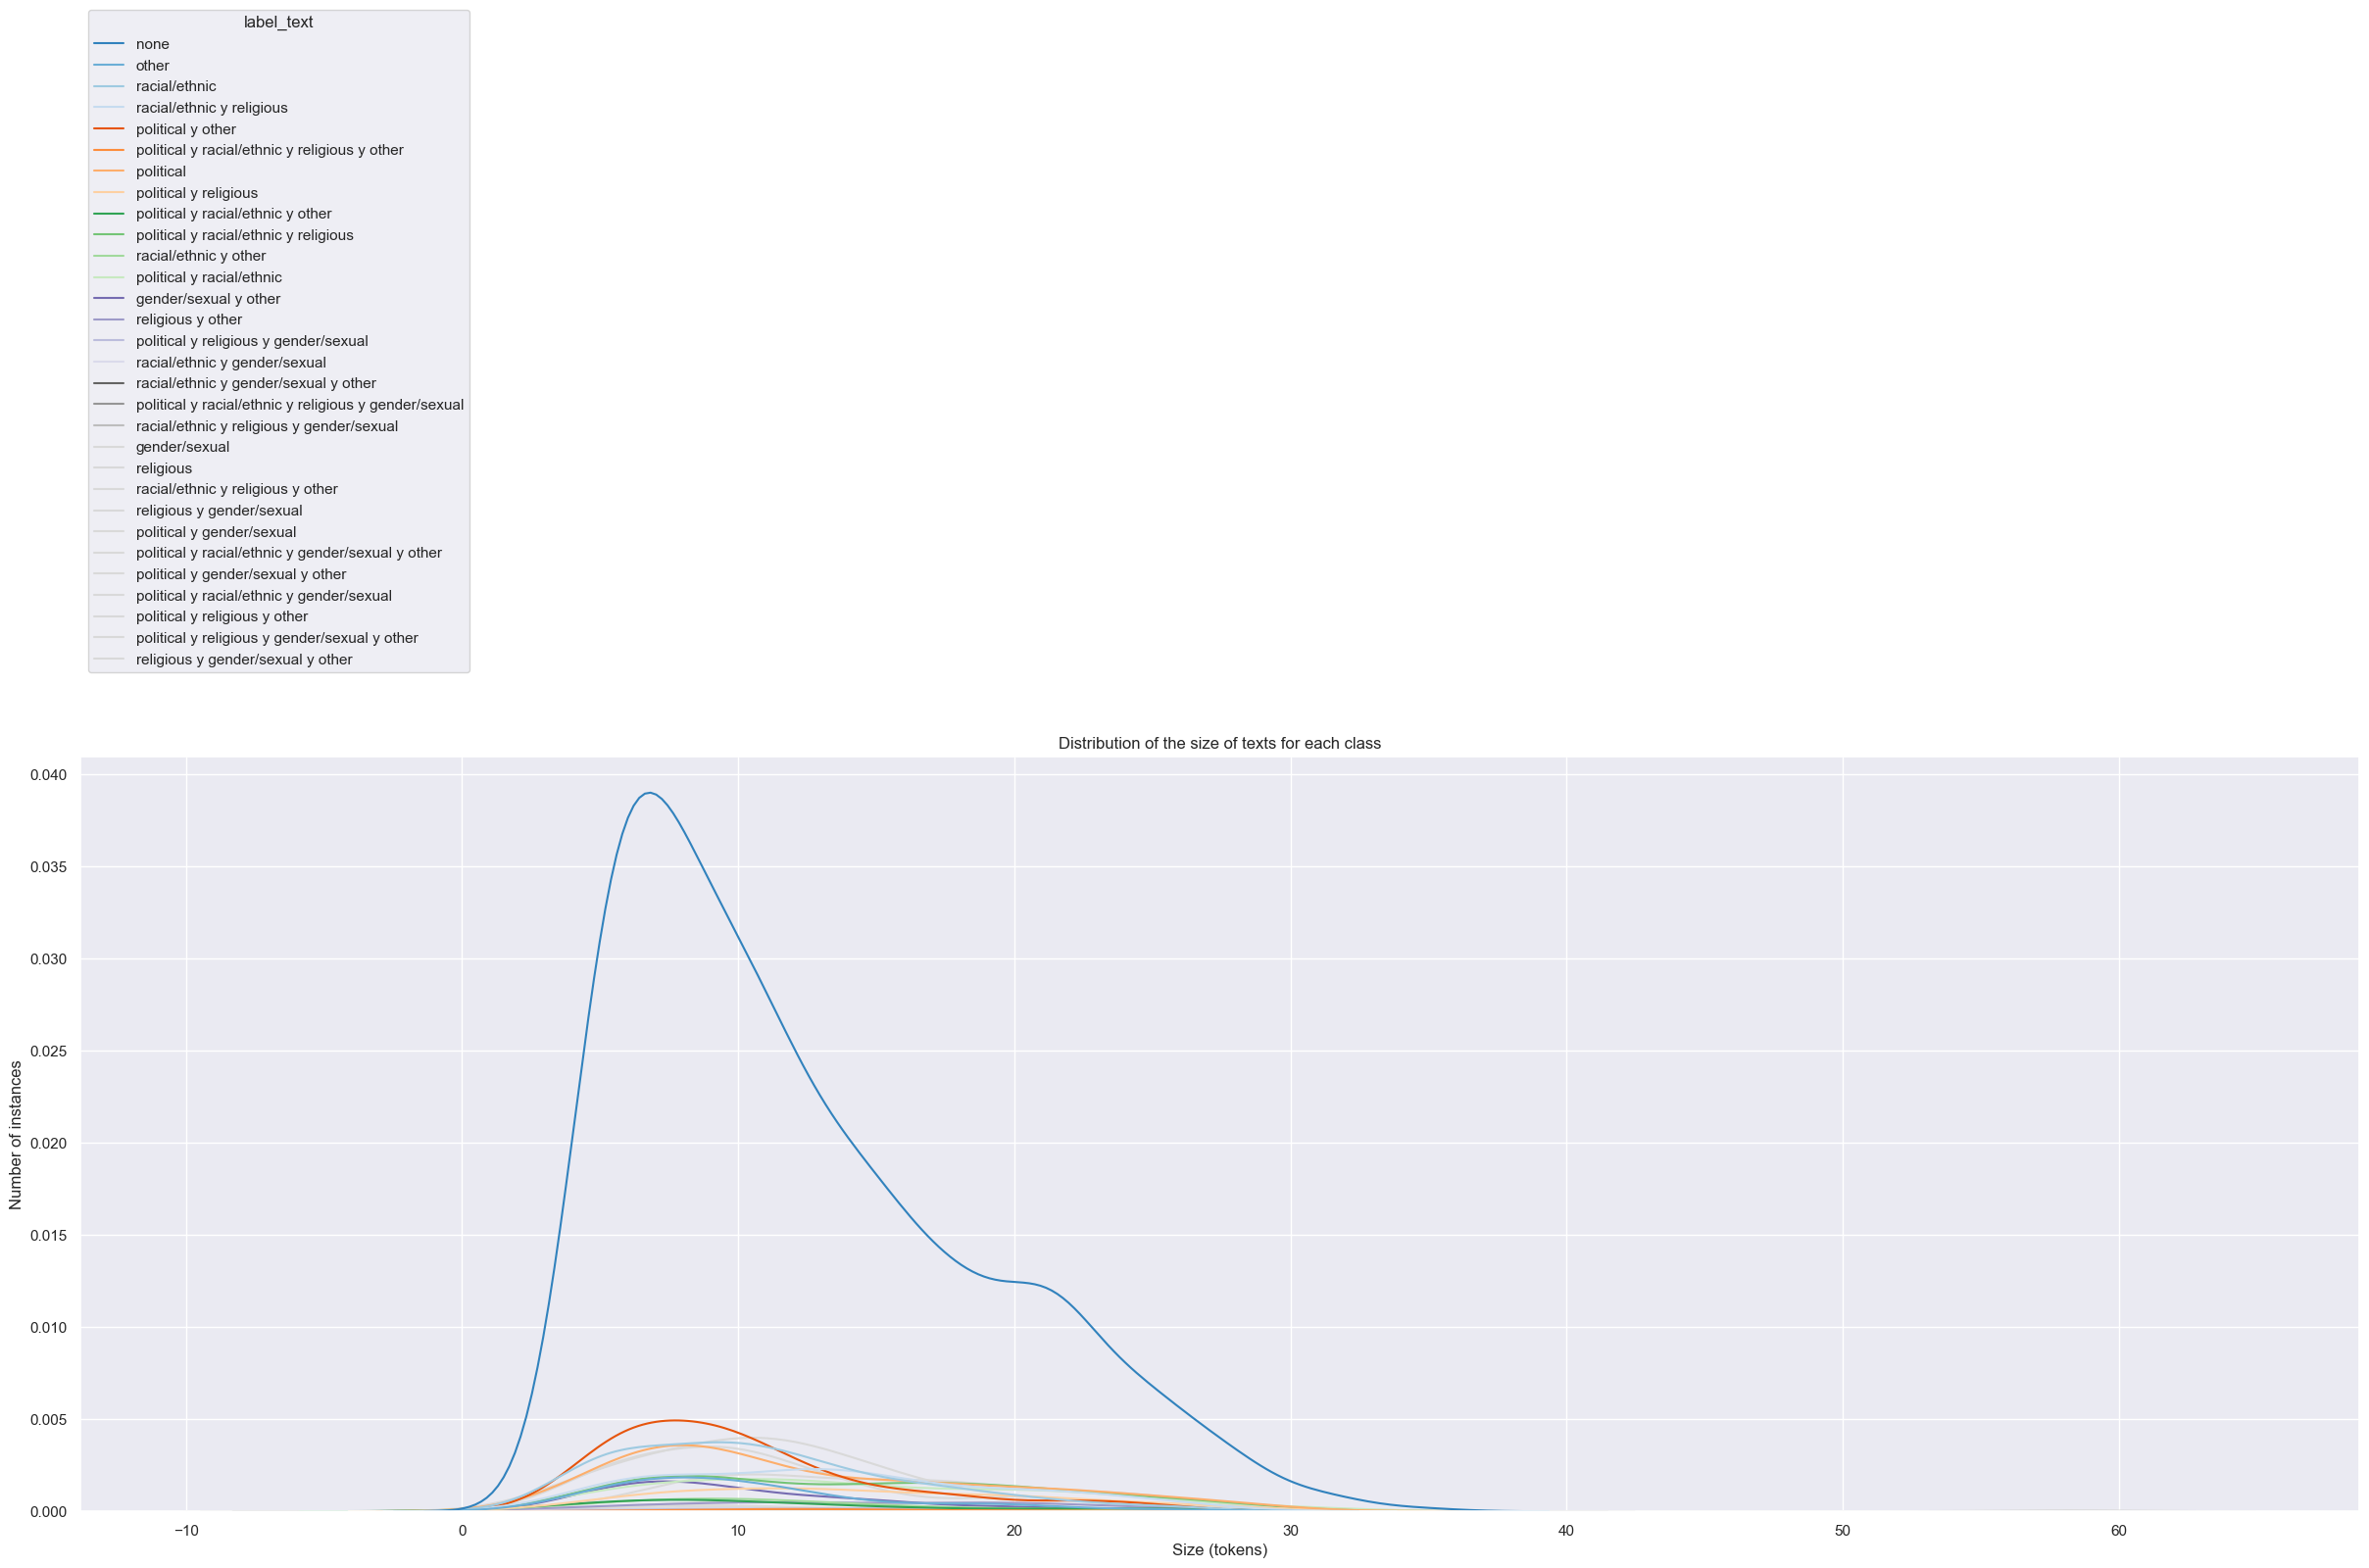

In [21]:
fig, (ax1) = plt.subplots(1,1, figsize=(30, 10), sharey=True)
colors = cmap(np.arange(len(labels)*2))
sns.kdeplot(data=df_multilabel_tmp, x='length', hue='label_text', legend=True, ax=ax1, palette=colors)
sns.move_legend(ax1, "upper left", bbox_to_anchor=(0, 2))
ax1.set(xlabel = 'Size (tokens)')
ax1.set(ylabel = 'Number of instances')
ax2.set(xlabel = 'Size (tokens)')
ax2.set(ylabel = 'Number of instances')
plt.title('Distribution of the size of texts for each class')